### <p style="text-align: right;"> &#9989; Macy Boren
   

# __MATH323 &ndash; Introduction to Numerical Analysis &ndash; Fall 2023__

# Programming Assignment 1 


In this programming assignment, you will use your programming skills to compute approximations of different quantities and investigate their errors. This gives you the opportunity to assess your understanding at this point in the course. If you need help, please come and see me. I am here to support you! 

## Goals

### By the end of this assignment you will have practiced several topics, including:

1. the error, absolute error and relative error
2. the impact of computer arithmetic 
3. the Taylor polynomial and its error
4. the basics of programming in Python

## Instructions

You have three weeks to complete this programming assignment. You are required to use LaTeX and Python to answer the questions. The procedure to submit this assignment is available in the Jupyter notebook `slides_review_basics_programming` in Canvas and is mandatory. Note that no late assignment will be accepted. 

**This assignment is due at 3:00 p.m. Wednesday, Sep 20 on Canvas.**

## Grading

* Part 0: Preliminary (1 point)
* Part 1: Stirling's approximation (8 points)
    * Question 1 (4 points)
    * Question 2 (3 points)
    * Question 3 (1 point)
* Part 2: Golden ratio (6 points)
    * Question 1 (6 points)
* Part 3: Estimations of $\pi$ (7 points)
    * Question 1 (3 points)
    * Question 2 (4 points)
* Part 4: Taylor polynomials (11 points)
    * Question 1 (4 points)
    * Question 2 (3 points)
    * Question 3 (4 points)
* Part 5: Approximations of the exponential function (9 points)
    * Question 1 (1 point)
    * Question 2 (2 points)
    * Question 3 (6 points)
* Part 6: Computation of a squence (13 points)
    * Question 1 (2 points)
    * Question 2 (2 points)
    * Question 3 (2 points)
    * Question 4 (2 points)
    * Question 5 (5 points)

Total points: **55**
___

## Part 0:  Preliminary (1 point)

**Question 1**: Import in the cell below all the modules that you will need in this assignment.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt # library to display the results
%matplotlib inline

## Part 1: Stirling's approximation (8 points)

The Stirling's approximation 

\begin{equation*}
    s_n = \frac{n^n\sqrt{2\pi n}}{e^n}
\end{equation*}

estimates the factorial of $n$, that is $n! = 1\times2\times3\times\dots\times n$.

**Question 1**

Compute the factorial of $n$ and its Stirling's approximation for $n=1,2,\dots,12$. 

In [2]:
n = 1
fact_vec = np.zeros(12)
stirling_vec = np.zeros(12)

for a in range (1,13):
    n = n * a
    stir = ((a**a)* np.sqrt(2 * np.pi *a)) / (np.exp(a))
    fact_vec[a-1] = n
    stirling_vec[a-1] = stir

**Question 2**

Compute the absolute error and relative error for each $n$ and display it as a table of three columns containing the values of $n$, the absolute errors and the relative errors. 

In [3]:
print("%s \t %s \t %s \n" % ("n", "absolute error", "relative error"))

for a in range (1,13):
    abserror = np.abs(fact_vec[a-1] - stirling_vec[a-1])
    relerror = abserror / np.abs(fact_vec[a-1])
    print("%d \t %1.3e \t\t %1.3e" % (a, abserror, relerror))

n 	 absolute error 	 relative error 

1 	 7.786e-02 		 7.786e-02
2 	 8.100e-02 		 4.050e-02
3 	 1.638e-01 		 2.730e-02
4 	 4.938e-01 		 2.058e-02
5 	 1.981e+00 		 1.651e-02
6 	 9.922e+00 		 1.378e-02
7 	 5.960e+01 		 1.183e-02
8 	 4.176e+02 		 1.036e-02
9 	 3.343e+03 		 9.213e-03
10 	 3.010e+04 		 8.296e-03
11 	 3.012e+05 		 7.545e-03
12 	 3.314e+06 		 6.919e-03


**Question 3**

Is the Stirling's approximation more accurate as $n$ increases? Explain your answer.

<font size=6 color="#009600">&#9998;</font>  The table provided displays the $n$ value which us used to caluctated the exact value and Stirling's approximation, as well as, the absolute errors and relative errors. $n$ ranges from 1 to 12 and is used to to calculate Stirling's approximation and the exact factorization value. The absolute error is found by taking the difference between the exact value and Stirlings approximated value while, the relative error places the error in reference of the problem. This is achieved by dividing the absolute error by the exact value.

This table of values will help us to determine if Stirling's approximation becomes more accurate as $n$ increases. By analyzing the more accurate relative error, it is shown that as $n$ increases the relative error decreases. Becuase of the decreasing error, that means Stirling's approximation becomes more accurate with increasing $n$ values. A smaller error value demonstrates that the approximation is getting closer to the real number. 

## Part 2: Golden ratio (6 points)

The golden ratio $\alpha = \frac{1+\sqrt{5}}{2}$ can be approximated by the ratio $\frac{F_{n}}{F_{n-1}}$. Here $F_n$ is the $n$th number in the Fibonacci sequence

\begin{equation*}
    \left\{
    \begin{aligned}
        F_0 =&\,\, 0, \quad F_1 =1, \\
        F_n =&\,\, F_{n-1} + F_{n-2}, \qquad n = 2, 3, 4, \dots
    \end{aligned}
    \right.
\end{equation*}

Knowing that 

\begin{equation*}
    \lim_{n\to\infty} \frac{F_{n}}{F_{n-1}} = \alpha,
\end{equation*}

we should expect the ratio to be more accurate when $n$ increases. 

**Question 1**

Determine the **smallest** value of $n$ for which the approximation of the golden ratio has at least 5 significant digits. Print the approximation, its relative error and the value of $n$.

In [4]:
F_n1 = 1 
F_n = 0
n = 1
approx_alpha = 0
exact_alpha = (1 + np.sqrt(5))/(2)

while abs(exact_alpha - approx_alpha)/abs(exact_alpha) >= (5 * (10 ** -5)):
    F_n2 = F_n1 + F_n
    F_n = F_n1
    F_n1 = F_n2
    approx_alpha = F_n1 / F_n 
    n +=1 
    rel_error =  abs(exact_alpha - approx_alpha)/abs(exact_alpha)
    
print('n =', n)
print('Approximation =', approx_alpha)
print('Relative Error =', rel_error)


n = 12
Approximation = 1.6179775280898876
Relative Error = 3.48946069117676e-05


---
## Part 3: Estimations of $\pi$ (7 points)

In this part, you will compute estimations of $\pi$. Knowing that the perimeter of a circle of radius 0.5 is equal to $\pi$, you could estimate its parameter and hence $\pi$ by the constructing regular polygons within it. This leads to the following recursion relation

\begin{equation*}
p_{k+1} = 2^k\,\sqrt{ 2\Big(\,1-\sqrt{1-\Big(\tfrac{p_k}{2^k}\Big)^2}\,\Big)} 
\end{equation*}

for $k\geq2$ and where $p_k$ is the perimeter of a $2^k$-sides polygon. 

**Question 1**

Knowing that $p_2=2\sqrt{2}$, compute the approximation of $\pi$ and its absolute error for $k = 2, 3, \dots, 36$. Display the results as a table of three columns containing the values of $k$, the approximations and the absolute errors.

In [5]:
k = 1
p_k = 2 * np.sqrt(2)
print("%s \t %s \t %s \t" % ('k','Approximations','Absolute Errors'))

for k in range(2,37):
    p_k_1 = (2 ** k) * np.sqrt(2 * (1 - np.sqrt(1- ((p_k/(2 ** k))** 2))))
    p_k = p_k_1
    absolute_error = np.abs(np.pi - p_k)
    print("%d \t %2.5f \t\t %1.3e"%(k,p_k,absolute_error))
    

k 	 Approximations 	 Absolute Errors 	
2 	 3.06147 		 8.013e-02
3 	 3.12145 		 2.015e-02
4 	 3.13655 		 5.044e-03
5 	 3.14033 		 1.261e-03
6 	 3.14128 		 3.154e-04
7 	 3.14151 		 7.885e-05
8 	 3.14157 		 1.971e-05
9 	 3.14159 		 4.928e-06
10 	 3.14159 		 1.232e-06
11 	 3.14159 		 3.080e-07
12 	 3.14159 		 7.704e-08
13 	 3.14159 		 2.013e-08
14 	 3.14159 		 1.218e-09
15 	 3.14159 		 8.269e-09
16 	 3.14159 		 4.621e-08
17 	 3.14159 		 2.573e-07
18 	 3.14159 		 1.472e-06
19 	 3.14160 		 3.900e-06
20 	 3.14160 		 3.900e-06
21 	 3.14167 		 8.161e-05
22 	 3.14183 		 2.370e-04
23 	 3.14245 		 8.586e-04
24 	 3.14245 		 8.586e-04
25 	 3.16228 		 2.069e-02
26 	 3.16228 		 2.069e-02
27 	 3.46410 		 3.225e-01
28 	 4.00000 		 8.584e-01
29 	 0.00000 		 3.142e+00
30 	 0.00000 		 3.142e+00
31 	 0.00000 		 3.142e+00
32 	 0.00000 		 3.142e+00
33 	 0.00000 		 3.142e+00
34 	 0.00000 		 3.142e+00
35 	 0.00000 		 3.142e+00
36 	 0.00000 		 3.142e+00


**Question 2**

For which $k$ the approximation is the most accurate? Describe the behavior of the absolute error and explain the results. Provide numerical evidences of your claim.

<font size=6 color="#009600">&#9998;</font>  Using this recursion relation, the information should be presetned in three columns of k, the approximation, and the exact value. Becuase k in increasing the approximation should be increasing as well with the absolute error increasing as it aprroaches $\pi$ and decreasing as the approximation gets further from $\pi$.

The K values corresponds with the approximations from the function $p_k$, which is the perimeter of a $2^k$-sides polygon, and the absolute error, which is calculated from the exact value $\pi$. The approximation increases the most between k values 1 to 3 then seems to continuously increase at a slower rate around 3.14. At k = 28 the approximation of $\pi$ hits 4 then after that the approximation is 0 due to the nature of the approximation.

The absolute errors follow the pattern of the approximation which increase and decrease consistently. The trend is that as the approximation starts and ends further away from $\pi$, the absolute error will be greater at the beginning and end, while more accurate in the center when the approximation is closest. 

The approximation is closest to $\pi$ at k = 14 due to it corresponding with the smallest error of $1.218^{-09}$. The absolute error is also decreasing until this point then increases after. 

To analyse the series and show that k increases so does the approximation, let's take a look at the first square root. $\sqrt{1-\Big(\tfrac{p_k}{2^k}\Big)^2}$

In [6]:
k = 1
p_k = 2 * np.sqrt(2)
print("%s" % ('Value under the square root'))

for k in range(2,37):
    p_k_1 = (2 ** k) * np.sqrt(2 * (1 - np.sqrt(1- ((p_k/(2 ** k))** 2))))
    p_k = p_k_1 
    under =  np.sqrt(1- ((p_k/(2 ** k))** 2))
    print(under)

Value under the square root
0.6435942529055825
0.9207383260311116
0.9805970430337126
0.995173077079758
0.9987947298671258
0.9996987733274502
0.9999246990040245
0.9999811751054127
0.999995293798502
0.9999988234510098
0.9999997058628389
0.9999999264657152
0.999999981616429
0.9999999954041073
0.9999999988510269
0.9999999997127567
0.9999999999281891
0.9999999999820472
0.9999999999955118
0.9999999999988779
0.9999999999997194
0.9999999999999298
0.9999999999999825
0.9999999999999956
0.9999999999999989
0.9999999999999997
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


This shows that becuase the series is baised on past values, it will always be increasing. We also see that there is a point at which, the value under the square root in one.

## Part 4: Taylor polynomials (11 points)

**Question 1**

Compute the fourth-degree Taylor polynomial of $g(x)=\ln(1+x)$ around $x_0 = 0$. Show the details of your computation. Identify clearly the Taylor polynomial and its error term. What is the order of the Taylor polynomial approximating $g(x)$ with $x>0$?

<font size=6 color="#009600">&#9998;</font>  The formula for the Taylor Series polynomial is given by...

\begin{equation*}
    P_n(x) = \displaystyle\sum_{k=0}^n \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k
\end{equation*}

And our knowns are $x_0 = 0$ , $g(x) = \ln(1+x)$

\begin{equation*}
    P_4(x) = g(x_0) + g^{(1)}(x_0)h + \frac{g^{(2)}(x_0)}{2} h^2 + \frac{g^{(3)}(x_0)}{6} h^3 + \frac{g^{(4)}(x_0)}{24} h^4         
\end{equation*}

We need to find up to the fourth derivative of g(x).

\begin{equation*}
    \begin{aligned}
    g(x_0) = &\,\, ln(1+x_0)\\
    g^{(1)}(x_0) = &\,\, (1+x_0)^{(-1)}\\
    g^{(2)}(x_0) = &\,\, -(1+x_0)^{(-2)}\\
    g^{(3)}(x_0) = &\,\, 2(1+x_0)^{(-3)}\\
    g^{(4)}(x_0) = &\,\, -6(1+x_0)^{(-4)}\\
    g^5{(5)}(x_0) = &\,\, 24(1+x_0)^{(-5)}\\
    \end{aligned}
\end{equation*}

Evaluating the derivatives at x_0 = 0 and x = x_0 + h we obtain

\begin{equation*}
    \begin{aligned}
    P_4(x) = &\,\, ln(1+x_0) + \frac{h}{(1+x_0)} - \frac{h^2}{2(1+x_0)^2} + \frac{2h^3}{6(1+x_0)^3} - \frac{6h^4}{24(1+x_0)^4}\\
    = &\,\, ln(1+x_0) + \frac{h}{(1+x_0)} - \frac{h^2}{2(1+x_0)^2} + \frac{h^3}{3(1+x_0)^3} - \frac{h^4}{4(1+x_0)^4}\\
    = &\,\, ln(1) + {h} - \frac{h^2}{2} + \frac{h^3}{3} - \frac{h^4}{4}\\
    = &\,\, {h} - \frac{h^2}{2} + \frac{h^3}{3} - \frac{h^4}{4}\\
    \end{aligned}
\end{equation*}

Where the truncation error term included is


\begin{equation*}
    R_n(h) = \frac{f^{(n+1)}(\xi)}{(n+1)!}h^{n+1}
\end{equation*}

\begin{equation*}
    \begin{aligned}
    R_4(h) = &\,\,\frac{f^{(4+1)}(\xi)}{(4+1)!}h^{4+1}\\
    = &\,\,\frac{f^{(5)}(\xi)}{(5)!}h^{5} \\
    = &\,\,\frac{24}{120(1+\xi)^5}h^{5} \\
    = &\,\,\frac{h^5}{5(1+\xi)^5} \\   
    \end{aligned}
\end{equation*}

In this case $\xi$ lies between the interval $x_0=0$ and h and is maximaized at $\xi$ = 0, so we need to upper bound the absolute error.

\begin{equation*}
    |R_4(h)| \leq \max_{\xi} |\frac{1}{(1+\xi)}| \frac{h^5}{5} = \frac{h^5}{5}
\end{equation*}

Finally it is reveiled that the Taylor Polynomial $P_n$ and its error term $R_n$ is 

\begin{equation*}
    g(x) = {h} - \frac{h^2}{2} + \frac{h^3}{3} - \frac{h^4}{4} + \frac{h^5}{5} 
\end{equation*}

Showing that the Taylor polynomial $P_4(x)$ is a fifth-order approximation of $g(x)$.

**Question 2**

Using the Taylor expansion of $g(x)$, compute the two first terms of the Taylor expansion of 

\begin{equation*}
    f(x) = \ln\big(\tfrac{1+x}{1-x}\big)=\ln(1+x)-\ln(1-x)
\end{equation*}

around $x_0=0$. Determine the degree of the resulting Taylor polynomial and its first error term. 

<font size=6 color="#009600">&#9998;</font>  

The Taylor series polynomial $P_n$ for $f(x) = ln(1-x)$

\begin{equation*}
    \begin{aligned}
    P_n(x) = &\,\,f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2} h^2 + \frac{f^{(3)}(x_0)}{6} h^3 + \frac{f^{(4)}(x_0)}{24} h^4 + \cdots \\
    = &\,\ ln(1) - x - \frac{h^2}{2} - \frac{h^3}{3} - \frac{h^4}{4} - \cdots \\
    = &\,\ - h - \frac{h^2}{2} - \frac{h^3}{3} - \frac{h^4}{4} +\cdots 
    \end{aligned}
\end{equation*}


The Taylor series polynomial $P_n$ for $f(x) = ln(1+x)$ 

\begin{equation*}
    P_n(x) = {h} - \frac{h^2}{2} + \frac{h^3}{3} - \frac{h^4}{4} + \cdots 
\end{equation*}

Then that means the Taylor series polynomial $P_2$ for $f(x) = ln(1+x) - ln(1-x)$

\begin{equation*}
    \begin{aligned}
    P_2(x) = &\,\,{h} - \frac{h^2}{2}  + \frac{h^3}{3} -(- h - \frac{h^2}{2} - \frac{h^3}{3})\\
    = &\,\, {h} - \frac{h^2}{2} +  \frac{h^3}{3} + \frac{h^2}{2}  + \frac{h^3}{3}\\
    = &\,\, 2h + \frac{2h^3}{3}
    \end{aligned}
\end{equation*}

The truncation error is found to be

\begin{equation*}
    R_2(h) = \frac{2h^5}{5} 
\end{equation*}


The degree of $P_n$ is 2 with a fifth-order approximation.

**Question 3**

Compute and print approximations of $\ln(2)$ using $g(x)$ and $f(x)$, and their absolute errors. Why the approximation computed with $f(x)$ is more accurate?

In [7]:
# Put your code here 
# to get ln(2)
# If g(x) is an approximation for ln(1+x) so x = 1
# If f(x) is an apporximation for ln(1+x) - ln(1-x) then x = 1/3

x = 1
g_x_approx = x - ((x**2)/2) + ((x**3)/3) - ((x**4)/4)
abs_error_g_x = np.abs(np.log(2)-g_x_approx)

z = 1/3
f_x_approx = (2*z) + ((2*(z**2))/3) #+ ((2*(z**5))/(5))
abs_error_f_x = np.abs(np.log(2)-f_x_approx)

print("%s \t %1.3e" % ("g(x) approximation of ln(2):",g_x_approx))
print("\t\t%s\t %1.3e\n"%("absolute error:",abs_error_g_x))
print("%s \t %1.3e" % ("f(x) approximation of ln(2):",f_x_approx))
print("\t\t%s\t %1.3e"%("absolute error:",abs_error_f_x))

g(x) approximation of ln(2): 	 5.833e-01
		absolute error:	 1.098e-01

f(x) approximation of ln(2): 	 7.407e-01
		absolute error:	 4.759e-02


<font size=6 color="#009600">&#9998;</font> The approximation of $ln(2)$ using the functions $g(x)$ and $f(x)$ and 0.5833 and 0.7408 respectively. With $f(x)$ having a smaller absolute error of 0.04759 as the absolute error of $f(x)$ is 0.1098.

The function $f(x)$ is a more accurate approximation of $ln(2)$ becuase of its lower absolute error and taylor series polynomial. The taylor series of $f(x) = \ln\big(\tfrac{1+x}{1-x}\big)=\ln(1+x)-\ln(1-x)$ has more terms that cancel which provides more terms with fewer calculations. 

## Part 5: Approximations of the exponential function (9 points)

The exponential function can be approximated by the rational function 

\begin{equation}
    r(x) = \frac{x^2+6x+12}{x^2-6x+12}
\end{equation}

around $x=0$. Here we want to approximate the order of the rational approximation $r(x)$.

**Question 1**

Create a function called `rational_app` that computes the rational approximation $r(x)$. The input is a vector containing the values of $x$ and the output is a vector containing the rational approximations.  

In [8]:
# Put your code here

def rational_app(vec):
    i = 0
    r_x = np.zeros(len(vec))
    for x in vec:
        r_x[i] = (x**2 + 6*x +12)/(x**2 - 6*x + 12)
        i += 1
    return r_x


**Question 2** 

Compute the absolute error of $r(x)$ with $x=2^{-n}$ for $n=0,1,2,\dots,8.$ Display the results as a table of three columns containing $n$, $r$ and the absolute errors. 

In [9]:
print('n\tr\t\tabsolute errors')
x_vals = np.zeros(9)
abs_err = np.zeros(9)
for n in range(0,9):
    x_vals[n] = 2 ** (-n)
    
r_x = rational_app(x_vals)

for i in range(0,9):
    abs_err[i] = np.abs(np.exp(x_vals[i])-r_x[i])
    print('%d\t%f\t%1.3e'%(i,r_x[i],abs_err[i]))


n	r		absolute errors
0	2.714286	3.996e-03
1	1.648649	7.262e-05
2	1.284024	1.748e-06
3	1.133148	4.807e-08
4	1.064494	1.410e-09
5	1.031743	4.271e-11
6	1.015748	1.314e-12
7	1.007843	4.086e-14
8	1.003914	1.110e-15


**Question 3**

Plot the absolute error as a function of $x$ in a logarithmic scale. Estimate the order of the rational approximation $r(x)$.

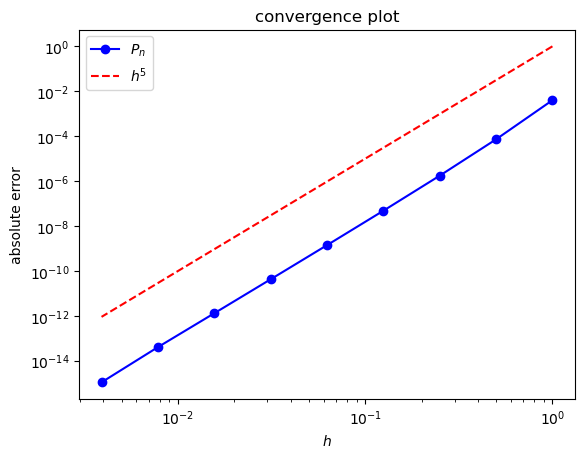

In [10]:
x = 0.5 ** np.arange(0,9,1)

plt.loglog(x, abs_err, label="$P_n$", color="blue", marker="o", linestyle="-")
plt.loglog(x, x**5, label="$h^5$", color="red", linestyle="--")
plt.legend()
plt.title("convergence plot")
plt.xlabel("$h$")
plt.ylabel("absolute error")
plt.show()

<font size=6 color="#009600">&#9998;</font>  The absolute error and h are plotted on the graph and follow an almost parallel linear path at a fifth-order approximation where n = 5.

## Part 6: Computation of a sequence (13 points)

We want to compute the sequence 

\begin{equation}
    I_n = \int_0^1 \frac{x^{n-1}}{10+x} dx
\end{equation}

for $n=1,2,\dots$ To do so, we use the recursion relation 

\begin{equation}
    \left\{
    \begin{aligned}
        I_1 =&\,\, \ln\big(\tfrac{11}{10}\big),  \\
        I_{n+1} =&\,\, \frac{1}{n} - 10 I_n, \qquad n = 1, 2, \dots
    \end{aligned}
    \right.
\end{equation}

We also know that the sequence $I_n$ should be decreasing and all its terms should be positive.

We now want to investigate the impact of the computer arithmetic on the computation of the sequence $I_n$. We then perturbe the starting value $I_1$.  

**Question 1**

Create a function `compute_In` that computes the terms for $n=1,2,\dots,20$. The input is the starting value $I_1$ and the output is a vector containing the terms $I_n$.

In [11]:
# Put your code here

def compute_In(I_n):
    I_vec = np.zeros(21)
    I_vec[0] = I_n
    for n in range(1,21):
        In_1 = (1/n) - (10*I_n)
        I_vec[n] = In_1
        I_n = In_1
    return(I_vec)

**Question 2**

Compute the sequence with three different starting values 

\begin{equation}
    I_1^0 = 0.095 \qquad\quad I_1^1 = 0.09531017 \qquad\quad  I_1^2 = 0.09531017980432
\end{equation}

Display the results as a table of four columns containing $n$ and the sequence for $I_n^0$, $I_n^1$ and $I_n^2$. 

In [12]:
print('n\tI_n_0\t\tI_n_1\t\tI_n_2')

I_0 = compute_In(0.095)
I_1 = compute_In(0.09531017)
I_2 = compute_In(0.09531017980432)

for n in range(0,20):
    print("%d \t %1.6e \t %1.6e \t %1.6e"%((n+1),I_0[n],I_1[n],I_2[n]))


n	I_n_0		I_n_1		I_n_2
1 	 9.500000e-02 	 9.531017e-02 	 9.531018e-02
2 	 5.000000e-02 	 4.689830e-02 	 4.689820e-02
3 	 -4.440892e-16 	 3.101700e-02 	 3.101798e-02
4 	 3.333333e-01 	 2.316333e-02 	 2.315353e-02
5 	 -3.083333e+00 	 1.836667e-02 	 1.846471e-02
6 	 3.103333e+01 	 1.633333e-02 	 1.535290e-02
7 	 -3.101667e+02 	 3.333333e-03 	 1.313765e-02
8 	 3.101810e+03 	 1.095238e-01 	 1.148061e-02
9 	 -3.101797e+04 	 -9.702381e-01 	 1.019390e-02
10 	 3.101798e+05 	 9.813492e+00 	 9.172069e-03
11 	 -3.101798e+06 	 -9.803492e+01 	 8.279309e-03
12 	 3.101798e+07 	 9.804401e+02 	 8.116002e-03
13 	 -3.101798e+08 	 -9.804318e+03 	 2.173318e-03
14 	 3.101798e+09 	 9.804326e+04 	 5.518989e-02
15 	 -3.101798e+10 	 -9.804325e+05 	 -4.804704e-01
16 	 3.101798e+11 	 9.804325e+06 	 4.871370e+00
17 	 -3.101798e+12 	 -9.804325e+07 	 -4.865120e+01
18 	 3.101798e+13 	 9.804325e+08 	 4.865709e+02
19 	 -3.101798e+14 	 -9.804325e+09 	 -4.865653e+03
20 	 3.101798e+15 	 9.804325e+10 	 4.865658e+04


**Question 3**

Let us neglect the round-off error of the term $\frac{1}{n}$, find an approximation of the absolute error of the form  $\Delta I_{n+1} \approx f(\Delta I_n)$. Here $\Delta I_n$ is the absolute error of the term $I_n$. Explain your development. 

<font size=6 color="#009600">&#9998;</font>  *Put your answer and explanation here*

We can see that $\Delta I_{n+1}$ becomes a recursion relation of the current term and the next term. For example, we see that $I_1 = f(I_0)$ and so on. This means we can characterize the propogation of the absolute error. The question then is, what is the function $f(x)$ and how to do find that. We know that $e = x - x^*$ and $f(x) = f(x* + e)$ which is the taylor series and truncation error.

x = x* + error
x* = x - error (SHOW HOW ERROR BEHAVIES)

**Question 4**

Using the approximation of the absolute error obtained in **Question 3**, estimate the absolute error of each term of the sequence for $I_n^0$, $I_n^1$ and $I_n^2$. 

Display the results as a table of four columns containing $n$ and the sequence for $\Delta I_n^0$, $\Delta I_n^1$ and $\Delta I_n^2$. 

In [13]:
# Put your code here

**Question 5**

Comment the results of **Question 2** and explain. 

<font size=6 color="#009600">&#9998;</font>  The table displays the n-values from 1 to 20 with three different starting points of the sequence. At $I_1^0$ the sequence alternated from positive to negative and its power is increasing making the value vastly large or small. $I_1^1$ is more accurate with the exponents beginning to decrease but also alternates positive and negative at n = 9. $I_1^2$ is the most accurate with the lowest starting value at  $I_1^2$ = 0.09531017980432$ and decreases until n = 14, which then the values begin to alternate as well.

The sequence should be all decreasing with positive values which is not reflected by the data in the table. This is due to the calcuation error of the sequence or by manipulating the starting value. These factors effect the sequence which some error may occur. The sequence calls for a staring value of $log\big(\tfrac{11}{10}\big)$ but, we tested the sequence with values that are all greater than $log\big(\tfrac{11}{10}\big)$, with $I_1^0$ being the furthest and least accurate to $I_1^2$ being the closest and most accurate.

### Congratulations! It is done!

Please submit your assignment on Canvas following the procedure described in the Jupyter notebook `slides_review_basics_programming`.